# 07wk-1: 딥러닝의 기초 (8)

최규빈  
2022-10-13

> 깊은신경망(4)– 지난시간리뷰, 드랍아웃

# 강의영상

> <https://youtube.com/playlist?list=PLQqh36zP38-xIaM33fBWd9bCF_FsXlg2f>

# imports

In [3]:
import torch
from fastai.vision.all import *
import matplotlib.pyplot as plt

# 지난시간리뷰

## 데이터

`-` model: $y_i = (0\times x_i) + \epsilon_i$

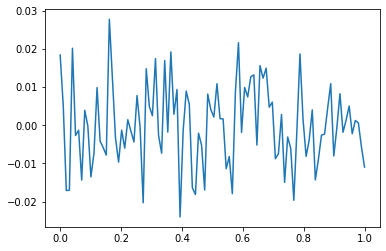

In [4]:
torch.manual_seed(5) 
x=torch.linspace(0,1,100).reshape(100,1)
y=torch.randn(100).reshape(100,1)*0.01
plt.plot(x,y)

## 모든 데이터를 사용하여 적합 (512, relu, 1000 epochs)

In [7]:
torch.manual_seed(1) 
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=512),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=512,out_features=1)
)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())

for epoc in range(1000):
    ## 1 
    yhat = net(x) 
    ## 2 
    loss = loss_fn(yhat,y) 
    ## 3 
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

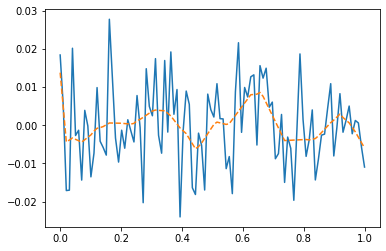

In [9]:
plt.plot(x,y)
plt.plot(x,net(x).data, '--')

## 전체데이터를 8:2로 나누어서 8만을 학습

`-` 데이터를 8:2로 나눈다

In [13]:
xtr = x[:80]
ytr = y[:80] 
xtest = x[80:] 
ytest = y[80:] 

In [16]:
x.shape, xtr.shape, xtest.shape

In [17]:
y.shape, ytr.shape, ytest.shape

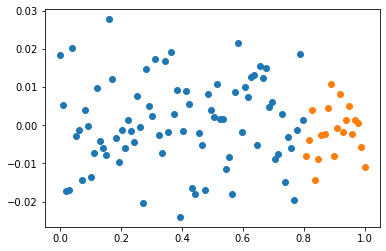

In [22]:
plt.plot(xtr,ytr,'o')
plt.plot(xtest,ytest,'o')

`-` (xtr,ytr) 만 가지고 net를 학습시킨다.

In [18]:
torch.manual_seed(1) 
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=512),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features=512,out_features=1)
)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())

for epoc in range(1000):
    ## 1 
    #
    ## 2 
    loss = loss_fn(net(xtr),ytr) 
    ## 3 
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

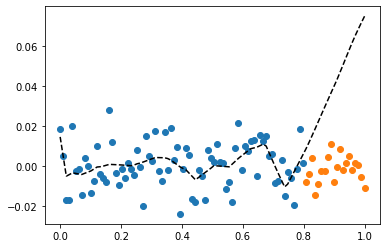

In [27]:
plt.plot(xtr,ytr,'o')
plt.plot(xtest,ytest,'o')
plt.plot(x,net(x).data,'--k') 

# 드랍아웃

## 오버피팅의 해결

`-` 오버피팅의 해결책: 드랍아웃

In [81]:
torch.manual_seed(1) 
net = torch.nn.Sequential(
    torch.nn.Linear(in_features=1,out_features=512),
    torch.nn.ReLU(),
    torch.nn.Dropout(0.8),
    torch.nn.Linear(in_features=512,out_features=1)
)
loss_fn = torch.nn.MSELoss()
optimizr = torch.optim.Adam(net.parameters())

for epoc in range(1000):
    ## 1 
    #
    ## 2 
    loss = loss_fn(net(xtr),ytr) 
    ## 3 
    loss.backward() 
    ## 4 
    optimizr.step()
    optimizr.zero_grad()

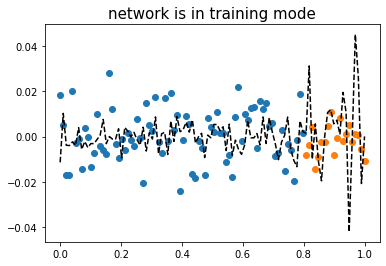

In [82]:
plt.plot(xtr,ytr,'o')
plt.plot(xtest,ytest,'o')
plt.plot(x,net(x).data,'--k') 
plt.title(r"network is in training mode",fontsize=15)

`-` 올바른 사용법

In [83]:
net.training

In [84]:
net.eval()
net.training

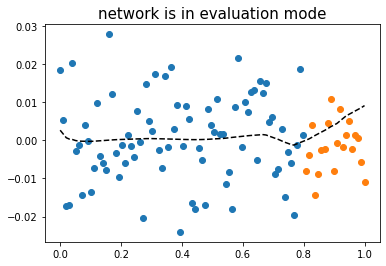

In [85]:
plt.plot(xtr,ytr,'o')
plt.plot(xtest,ytest,'o')
plt.plot(x,net(x).data,'--k') 
plt.title(r"network is in evaluation mode",fontsize=15)

## 드랍아웃 레이어

In [86]:
_x = torch.linspace(0,1,101) 
_x 

In [87]:
dout = torch.nn.Dropout(0.9)
dout(_x)

-   90%의 드랍아웃: 드랍아웃층의 입력 중 임의로 90%를 골라서 결과를
    0으로 만든다. + 그리고 0이 되지않고 살아남은 값들은 10배 만큼 값이
    커진다.

`-` 드랍아웃레이어 정리

-   구조: 입력 -\> 드랍아웃레이어 -\> 출력
-   역할: (1) 입력의 일부를 임의로 0으로 만드는 역할 (2) 0이 안된것들은
    스칼라배하여 드랍아웃을 통과한 모든 숫자들의 총합이 일정하게 되도록
    조정
-   효과: 오버피팅을 억제하는 효과가 있음 (왜??)
-   의미: each iteration (each epoch x) 마다 학습에 참여하는 노드가
    로테이션으로 랜덤으로 결정됨.
-   느낌: 모든 노드가 골고루 학습가능 + 한 두개의 특화된 능력치가
    개발되기 보다 평균적인 능력치가 전반적으로 개선됨